 
# Team 63 Exploratory Data Analysis : Petroleum Data
## Preliminary

 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Info about the Texas Petroleum Data
df_petro=pd.read_csv('../data/Complete_SEDS_update.csv')
print('Energy Data: ', df_petro.shape, df_petro.columns)
df_petro.head()

Energy Data:  (1837853, 5) Index(['Data_Status', 'MSN', 'StateCode', 'Year', 'Data'], dtype='object')


,Data_Status,MSN,StateCode,Year,Data
0,2019P,ABICB,AK,1960,0.0
1,2019P,ABICB,AK,1961,0.0
2,2019P,ABICB,AK,1962,0.0
3,2019P,ABICB,AK,1963,0.0
4,2019P,ABICB,AK,1964,0.0


In [14]:
#County information on needs to be matched up with County Name
#load the counties csv
TX_counties = pd.read_csv('../data/Counties.csv')
TX_counties.head()
#pull out only the country code and its associated name
County_Names = TX_counties.loc[:, 'FIPS':'FENAME']
# Merge the df_demo with the added columns from County_Name on FIPS ... County Code
df_demo_counties = pd.merge(left=df_demo, right=County_Names, left_on='COUNTY', right_on='FIPS')
# Since only have shutdown information from only a few of the 254 counties in TX
# We only want to look at the information for those counties
spec_counties = ['BELL','BEXAR','BOWIE','BRAZORIA','BRAZOS','HARRIS','CASTRO',
                 'CHAMBERS','COLLIN','Comal','DALLAS','DENTON','ELLIS','EL PASO']
df_spec_counties = df_demo_counties[df_demo_counties['FENAME'].isin(spec_counties)]



<AxesSubplot:xlabel='FENAME,YEAR'>

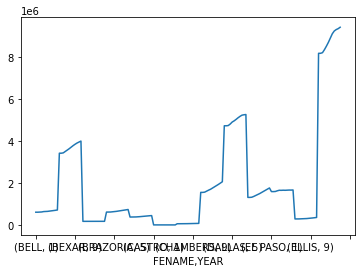

In [9]:
#look at how the total population of each county changes over the past years
df_spec_counties.groupby(['FENAME', 'YEAR'])['TOT_POP'].sum().plot()

<AxesSubplot:xlabel='YEAR'>

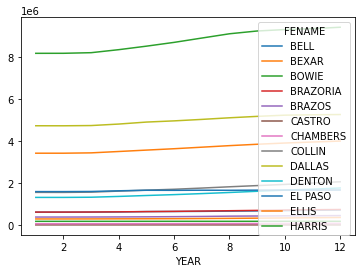

In [11]:
df_spec_counties.groupby(['YEAR','FENAME'])['TOT_POP'].sum().unstack().plot()

<AxesSubplot:ylabel='FENAME'>

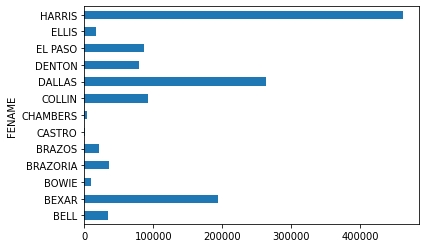

In [7]:
#Look at the mean of the population of the counties
df_spec_counties.groupby(['FENAME'])['TOT_POP'].mean().plot(kind='barh')

In [16]:
df_spec_counties.groupby(['FENAME', 'YEAR']).mean()

SUMLEV  STATE  COUNTY  AGEGRP        TOT_POP       TOT_MALE  \
FENAME YEAR                                                                
BELL   1       50.0   48.0    27.0     9.0   32656.315789   16154.105263   
       2       50.0   48.0    27.0     9.0   32648.315789   16150.631579   
       3       50.0   48.0    27.0     9.0   32931.473684   16308.631579   
       4       50.0   48.0    27.0     9.0   33242.000000   16447.894737   
       5       50.0   48.0    27.0     9.0   34206.631579   17144.947368   
...             ...    ...     ...     ...            ...            ...   
HARRIS 8       50.0   48.0   201.0     9.0  479773.263158  238729.684211   
       9       50.0   48.0   201.0     9.0  486732.631579  242040.736842   
       10      50.0   48.0   201.0     9.0  490312.842105  243615.684211   
       11      50.0   48.0   201.0     9.0  492636.315789  244611.052632   
       12      50.0   48.0   201.0     9.0  496139.473684  246257.157895   

                TOT_FEMALE        WA_MALE      WA_FEMALE       BA_MALE  ...  \
FENAME YEAR                                                             ...   
BELL   1      16502.210526   11210.526316   11208.526316   3620.000000  ...   
       2      16497.684211   11210.000000   11207.052632   3618.947368  ...   
       3      16622.842105   11321.684211   11287.052632   3649.894737  ...   
       4      16794.105263   11383.263158   11388.000000   3687.052632  ...   
       5      17061.684211   11875.684211   11542.947368   3824.526316  ...   
...                    ...            ...            ...           ...  ...   
HARRIS 8     241043.578947  170264.105263  166606.000000  44234.105263  ...   
       9     244691.894737  172216.315789  168673.473684  44994.315789  ...   
       10    246697.157895  172995.578947  169610.421053  45486.210526  ...   
       11    248025.263158  173321.684211  169995.157895  45979.684211  ...   
       12    249882.315789  174225.052632  170900.105263  46436.421053  ...   

               HWAC_FEMALE    HBAC_MALE  HBAC_FEMALE    HIAC_MALE  \
FENAME YEAR                                                         
BELL   1       3004.315789   360.315789   410.315789   146.315789   
       2       3004.000000   360.210526   410.315789   146.000000   
       3       3057.684211   364.842105   420.000000   150.421053   
       4       3181.894737   376.631579   433.052632   160.105263   
       5       3301.157895   392.421053   444.631579   162.315789   
...                    ...          ...          ...          ...   
HARRIS 8      93467.684211  3070.421053  3096.210526  2778.736842   
       9      95870.736842  3178.947368  3207.263158  2804.842105   
       10     97622.000000  3274.526316  3307.894737  2821.894737   
       11     99020.736842  3372.105263  3409.684211  2847.368421   
       12    100633.157895  3454.421053  3488.105263  2881.578947   

             HIAC_FEMALE   HAAC_MALE  HAAC_FEMALE   HNAC_MALE  HNAC_FEMALE  \
FENAME YEAR                                                                  
BELL   1      150.736842   88.526316    86.210526   41.368421    42.526316   
       2      150.631579   88.210526    86.105263   41.368421    42.526316   
       3      151.157895   82.000000    81.473684   37.578947    38.421053   
       4      157.473684   82.105263    85.052632   38.421053    39.157895   
       5      157.894737   86.631579    91.894737   41.052632    39.052632   
...                  ...         ...          ...         ...          ...   
HARRIS 8     2502.526316  883.789474   896.105263  266.736842   248.315789   
       9     2540.736842  907.684211   919.789474  272.736842   252.842105   
       10    2560.000000  929.789474   939.473684  274.736842   257.052632   
       11    2591.157895  951.263158   961.052632  281.368421   262.421053   
       12    2633.052632  968.736842   986.105263  280.842105   264.421053   

              FIPS  
FENAME YEAR         
BELL   1      27.0  
       2      27.0  

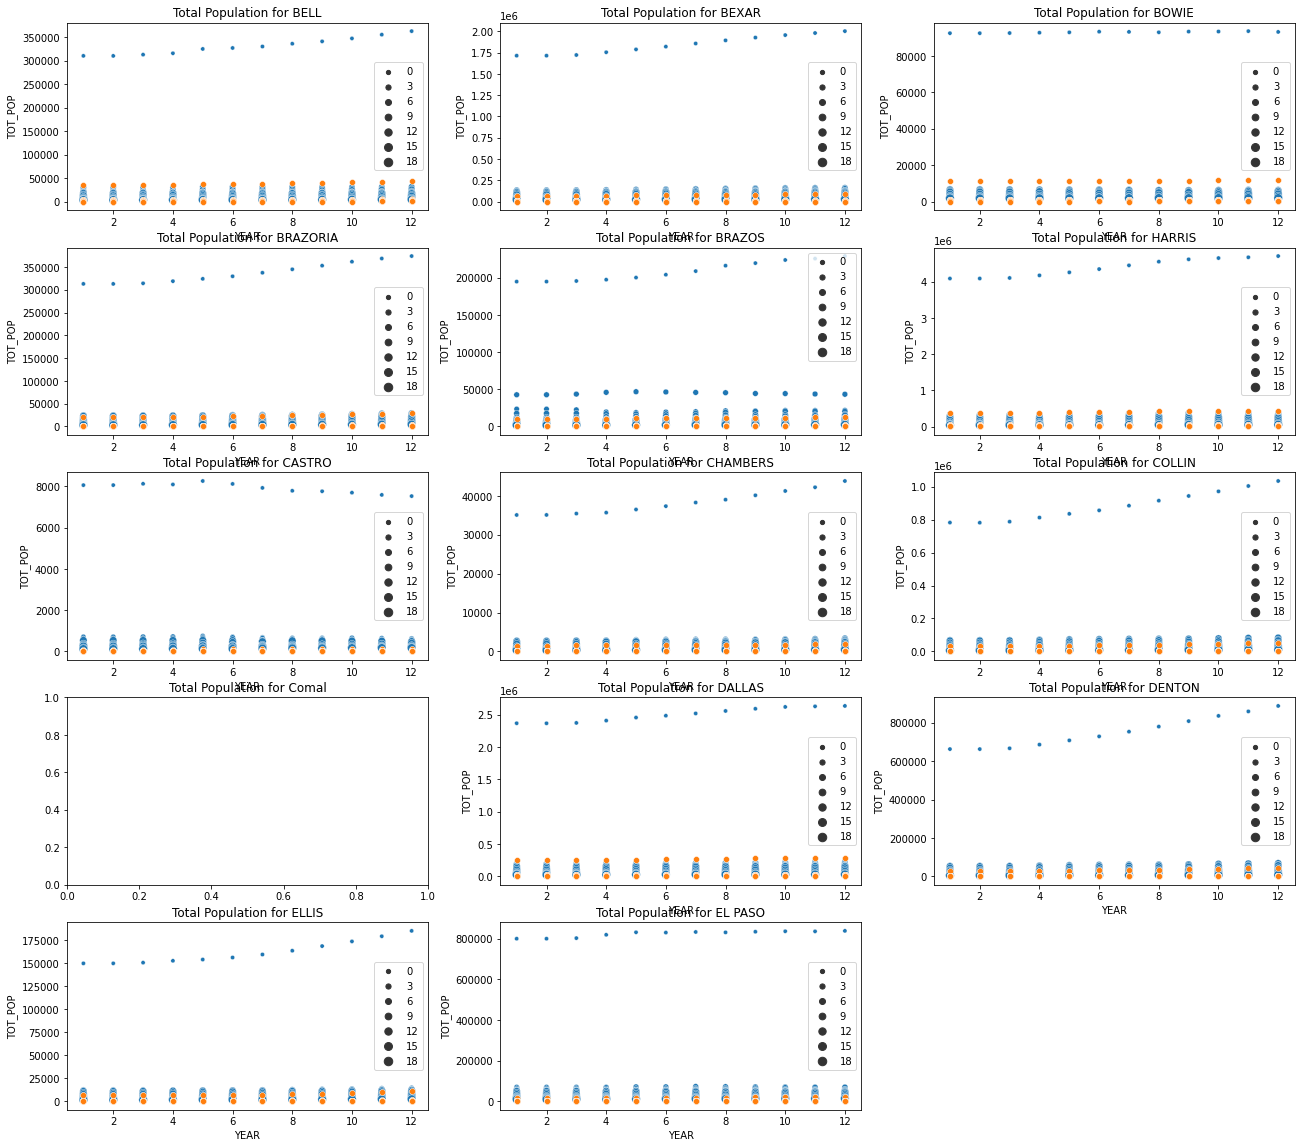

In [38]:
plt.figure(figsize=(22,20))

for i,county in enumerate(spec_counties):
 plt.subplot(5,3,i+1)
 sns.scatterplot(x = 'YEAR', y='TOT_POP', data = df_spec_counties[df_spec_counties['FENAME'] == county]')
 sns.scatterplot(x = 'YEAR', y='BA_MALE', data = df_spec_counties[df_spec_counties['FENAME'] == county])   
 plt.title("Total Population for " + str(county));

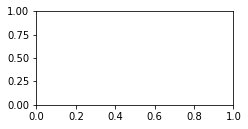

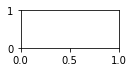

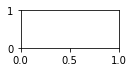

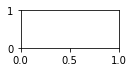

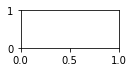

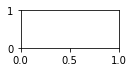

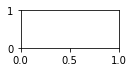

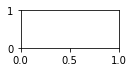

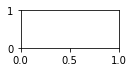

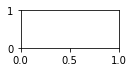

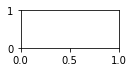

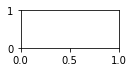

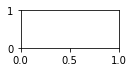

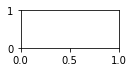

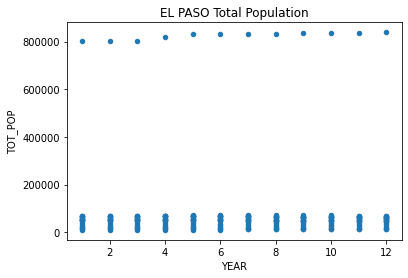

In [24]:
# Observations: 
plt.figure(figsize =(12,10))
for i, county in enumerate(spec_counties):
    plt.subplot(5,3,i+1)
    df_spec_counties[df_spec_counties['FENAME'] == spec_counties[i]].plot(kind = 'scatter', x='YEAR', y='TOT_POP' )
    plt.title(str(county) + " Total Population");

In [73]:
df_spec_counties.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

In [74]:
df_spec_counties.reset_index()

,index,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,...,HNAC_FEMALE,FIPS,FENAME,BlackOnly_Percentage,WhiteOnly_Percentage,IndigenousOnly_Percentage,MultiCultural_Percentage,HispanicsOnly_Percentage,BlacksAndHispanics_Percentage,AsianOnly_Percentage
0,2964,50,48,27,Texas,Bell County,1,0,310235,153464,...,404,27,BELL,0.224124,0.686515,0.010885,0.039744,0.215998,0.018908,0.038732
1,2965,50,48,27,Texas,Bell County,1,1,28365,14455,...,68,27,BELL,0.241072,0.624114,0.010365,0.093425,0.301710,0.034127,0.031024
2,2966,50,48,27,Texas,Bell County,1,2,24487,12450,...,59,27,BELL,0.256177,0.622371,0.012701,0.074815,0.291992,0.030628,0.033936
3,2967,50,48,27,Texas,Bell County,1,3,22232,11432,...,34,27,BELL,0.273075,0.615374,0.012190,0.067470,0.280856,0.027978,0.031891
4,2968,50,48,27,Texas,Bell County,1,4,22116,11253,...,41,27,BELL,0.276632,0.626424,0.012841,0.055254,0.253346,0.023377,0.028848
5,2969,50,48,27,Texas,Bell County,1,5,30001,15690,...,37,27,BELL,0.209960,0.704643,0.012900,0.037999,0.225026,0.019333,0.034499
6,2970,50,48,27,Texas,Bell County,1,6,29816,15214,...,44,27,BELL,0.221894,0.686410,0.010934,0.036356,0.232325,0.022035,0.044406
7,2971,50,48,27,Texas,Bell County,1,7,23022,11533,...,24,27,BELL,0.236774,0.670402,0.012293,0.035227,0.231474,0.020155,0.045304
8,2972,50,48,27,Texas,Bell County,1,8,20308,9853,...,21,27,BELL,0.241284,0.673281,0.011670,0.028412,0.213857,0.014969,0.045352
9,2973,50,48,27,Texas,Bell County,1,9,18695,9085,...,18,27,BELL,0.253918,0.672586,0.012570,0.020861,0.192993,0.011928,0.040064


In [75]:

#Add Percentages Columns since the County Populations vary significantly
df_spec_counties['BlackOnly_Percentage'] = (df_spec_counties['BA_MALE'] + df_spec_counties['BA_FEMALE'])/df_spec_counties['TOT_POP']
df_spec_counties['WhiteOnly_Percentage'] = (df_spec_counties['WA_MALE'] + df_spec_counties['WA_FEMALE'])/df_spec_counties['TOT_POP']
df_spec_counties['IndigenousOnly_Percentage'] = (df_spec_counties['IA_MALE'] + df_spec_counties['IA_FEMALE'])/df_spec_counties['TOT_POP']
df_spec_counties['MultiCultural_Percentage'] = (df_spec_counties['TOM_MALE'] + df_spec_counties['TOM_FEMALE'])/df_spec_counties['TOT_POP']
df_spec_counties['HispanicsOnly_Percentage'] = (df_spec_counties['H_MALE'] + df_spec_counties['H_FEMALE'])/df_spec_counties['TOT_POP']
df_spec_counties['BlacksAndHispanics_Percentage'] = (df_spec_counties['HBA_MALE'] + df_spec_counties['HBA_FEMALE'])/df_spec_counties['TOT_POP']
df_spec_counties['AsianOnly_Percentage'] = (df_spec_counties['AA_MALE'] + df_spec_counties['AA_FEMALE']+df_spec_counties['NA_MALE'] + df_spec_counties['NA_FEMALE'])/df_spec_counties['TOT_POP']





/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [76]:
df_spec_counties.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HNAC_FEMALE,FIPS,FENAME,BlackOnly_Percentage,WhiteOnly_Percentage,IndigenousOnly_Percentage,MultiCultural_Percentage,HispanicsOnly_Percentage,BlacksAndHispanics_Percentage,AsianOnly_Percentage
2964,50,48,27,Texas,Bell County,1,0,310235,153464,156771,...,404,27,BELL,0.224124,0.686515,0.010885,0.039744,0.215998,0.018908,0.038732
2965,50,48,27,Texas,Bell County,1,1,28365,14455,13910,...,68,27,BELL,0.241072,0.624114,0.010365,0.093425,0.301710,0.034127,0.031024
2966,50,48,27,Texas,Bell County,1,2,24487,12450,12037,...,59,27,BELL,0.256177,0.622371,0.012701,0.074815,0.291992,0.030628,0.033936
2967,50,48,27,Texas,Bell County,1,3,22232,11432,10800,...,34,27,BELL,0.273075,0.615374,0.012190,0.067470,0.280856,0.027978,0.031891
2968,50,48,27,Texas,Bell County,1,4,22116,11253,10863,...,41,27,BELL,0.276632,0.626424,0.012841,0.055254,0.253346,0.023377,0.028848


In [55]:
df_spec_counties['YEAR'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [77]:
df_spec_counties_2019 = df_spec_counties[df_spec_counties['YEAR']== 12].reset_index()

In [78]:
df_spec_counties_2019.head()

,index,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,...,HNAC_FEMALE,FIPS,FENAME,BlackOnly_Percentage,WhiteOnly_Percentage,IndigenousOnly_Percentage,MultiCultural_Percentage,HispanicsOnly_Percentage,BlacksAndHispanics_Percentage,AsianOnly_Percentage
0,3173,50,48,27,Texas,Bell County,12,0,362924,180296,...,446,27,BELL,0.244445,0.657413,0.010809,0.047236,0.255591,0.022148,0.040097
1,3174,50,48,27,Texas,Bell County,12,1,29887,15072,...,53,27,BELL,0.254258,0.608492,0.009770,0.092850,0.307927,0.029612,0.034630
2,3175,50,48,27,Texas,Bell County,12,2,28465,14324,...,52,27,BELL,0.252099,0.609696,0.010118,0.093694,0.319831,0.032004,0.034393
3,3176,50,48,27,Texas,Bell County,12,3,26648,13683,...,55,27,BELL,0.270039,0.602372,0.010432,0.085185,0.324077,0.034449,0.031972
4,3177,50,48,27,Texas,Bell County,12,4,25277,13063,...,37,27,BELL,0.268030,0.614195,0.012145,0.072952,0.312972,0.029869,0.032678


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

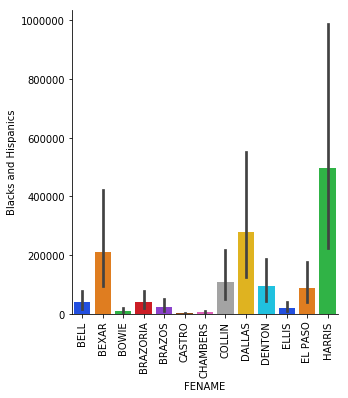

In [98]:
#Univariate Analysis
plt.figure(figsize=(20,10))
g=sns.catplot(x='FENAME', y='TOT_POP', kind='bar', data=df_spec_counties_2019, palette='bright')
g.set_ylabels('Blacks and Hispanics')
plt.xticks(rotation=90)

In [ ]:
#sns.countplot(df_spec_counties['FENAME'])

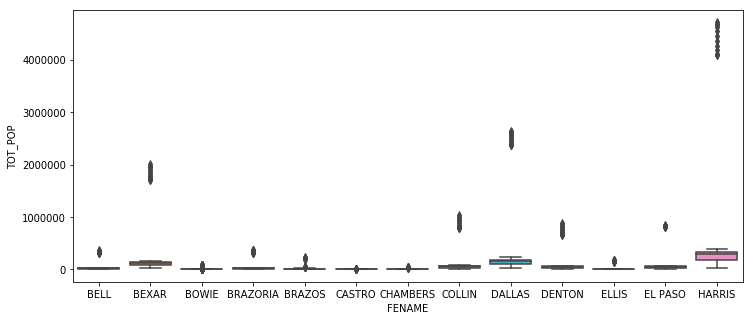

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(x='FENAME', y='TOT_POP', data=df_spec_counties)

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='FENAME', hue='H_FEMALE', data=df_spec_counties)

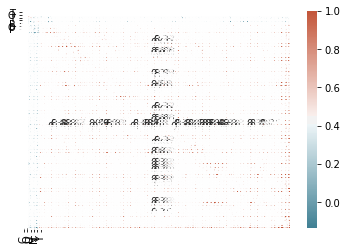

In [9]:
demo_TX_corr = df_demo_TX.corr()
sns.heatmap(demo_TX_corr, xticklabels='COUNTY', yticklabels='TOT_POP', 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [8]:
df_spec_counties['H_FEMALE'].describe()

count    2.964000e+03
mean     2.083446e+04
std      7.817359e+04
min      1.000000e+00
25%      3.140000e+02
50%      2.592500e+03
75%      1.559350e+04
max      1.010934e+06
Name: H_FEMALE, dtype: float64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


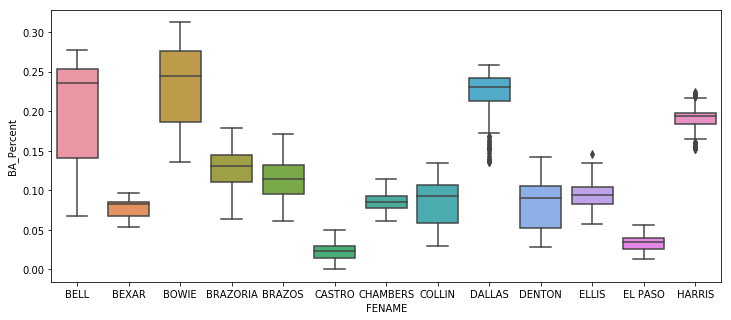

In [13]:
df_spec_counties['BA_Percent'] = (df_spec_counties['BA_MALE'] + df_spec_counties['BA_FEMALE'])/df_spec_counties['TOT_POP']
plt.figure(figsize=(12,5))
sns.boxplot(x='FENAME', y='BA_Percent', data=df_spec_counties)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


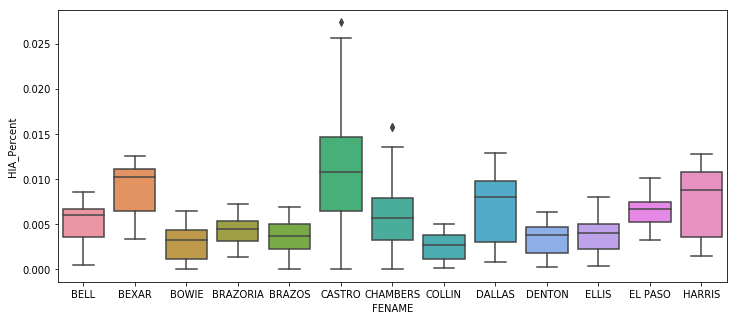

In [14]:
df_spec_counties['HIA_Percent'] = (df_spec_counties['HIA_MALE'] + df_spec_counties['HIA_FEMALE'])/df_spec_counties['TOT_POP']
plt.figure(figsize=(12,5))
sns.boxplot(x='FENAME', y='HIA_Percent', data=df_spec_counties)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


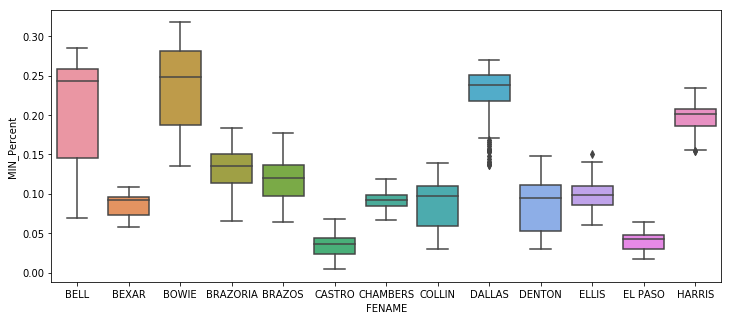

In [15]:
df_spec_counties['MIN_Percent'] = (df_spec_counties['HIA_MALE'] + df_spec_counties['HIA_FEMALE']+df_spec_counties['BA_MALE'] + df_spec_counties['BA_FEMALE'])/df_spec_counties['TOT_POP']
plt.figure(figsize=(12,5))
sns.boxplot(x='FENAME', y='MIN_Percent', data=df_spec_counties)

In [16]:
df_spec_counties['AGEGRP'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

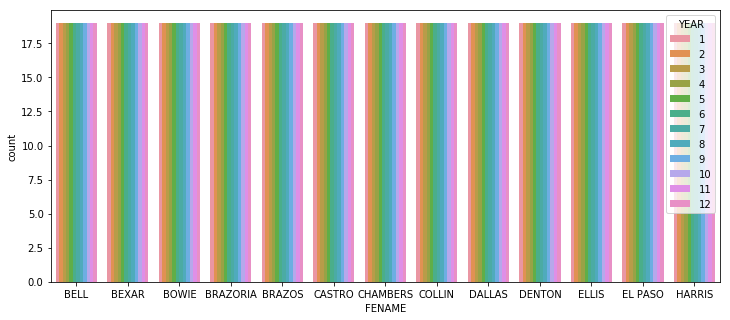

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x='FENAME', hue='YEAR', data=df_spec_counties)

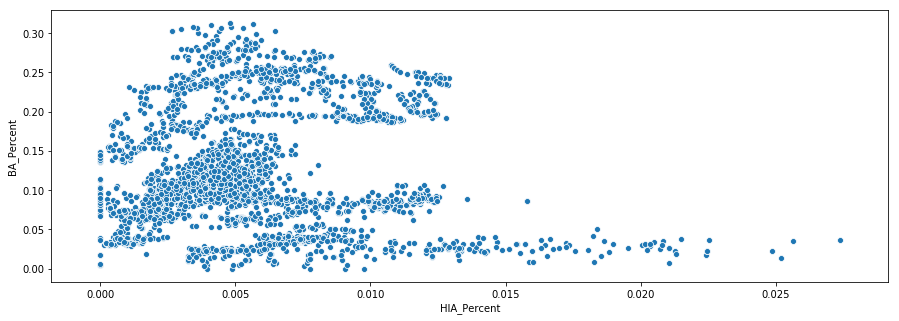

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(df_spec_counties['HIA_Percent'], df_spec_counties['BA_Percent'])
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


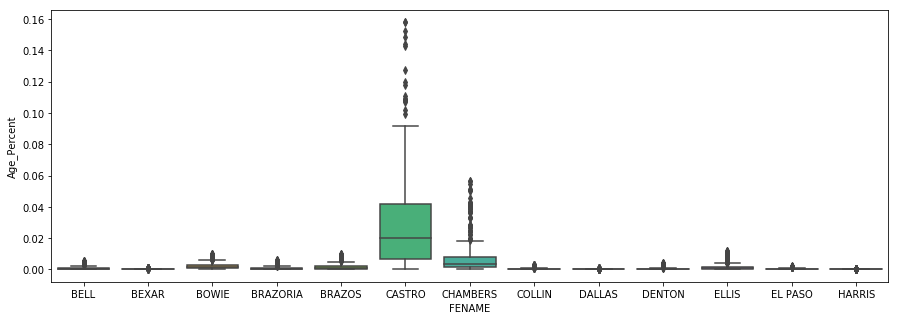

In [29]:
df_spec_counties['Age_Percent'] = (df_spec_counties['AGEGRP'])/df_spec_counties['TOT_POP']
plt.figure(figsize=(15,5))
#sns.countplot(x='FENAME', hue='Age_Percent', data=df_spec_counties)
sns.boxplot(x='FENAME', y='Age_Percent', data=df_spec_counties)

In [31]:
df_spec_counties['AGEGRP'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [38]:
#pd.crosstab(df_spec_counties['FENAME'], df_spec_counties['AGEGRP'])
df_spec_counties.pivot_table(values='BA_Percent', index='FENAME', columns="AGEGRP", aggfunc=np.mean)

AGEGRP,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
FENAME,,,,,,,,,,,,,,,,,,,
BELL,0.230662,0.237658,0.251602,0.269277,0.270588,0.231837,0.236007,0.242316,0.245805,0.254138,0.253268,0.242363,0.215621,0.174690,0.142447,0.126607,0.114862,0.098618,0.078586
BEXAR,0.082296,0.084526,0.084904,0.086159,0.090446,0.092064,0.086187,0.082985,0.080216,0.080714,0.084262,0.085167,0.082341,0.074186,0.067555,0.064091,0.064639,0.059860,0.055329
BOWIE,0.247557,0.284813,0.276488,0.280998,0.293805,0.295763,0.286138,0.270882,0.267190,0.250847,0.236544,0.232209,0.227550,0.209736,0.183116,0.160935,0.147372,0.140323,0.146483
BRAZORIA,0.133938,0.122911,0.128429,0.136152,0.143798,0.138217,0.135870,0.145097,0.155738,0.157007,0.152508,0.140921,0.127169,0.119837,0.107941,0.086132,0.072004,0.069744,0.078021
BRAZOS,0.111688,0.141062,0.156605,0.165617,0.102034,0.064781,0.114137,0.117502,0.122991,0.133674,0.140894,0.137781,0.127251,0.109915,0.097124,0.091946,0.090575,0.085245,0.080586
CASTRO,0.024175,0.023749,0.023812,0.031572,0.030067,0.031590,0.023193,0.025383,0.024513,0.019684,0.016528,0.026508,0.027551,0.027582,0.019965,0.007309,0.003428,0.019642,0.019846
CHAMBERS,0.084410,0.071646,0.072587,0.084082,0.093847,0.095031,0.077651,0.073597,0.084562,0.086101,0.087109,0.084108,0.083033,0.089656,0.095260,0.099348,0.096824,0.081891,0.087796
COLLIN,0.095073,0.096565,0.100262,0.104901,0.112845,0.113311,0.110055,0.109780,0.111343,0.103605,0.094390,0.086417,0.077543,0.067176,0.056160,0.045359,0.038010,0.034635,0.031077
DALLAS,0.231350,0.218802,0.233872,0.246147,0.249190,0.234897,0.219065,0.221130,0.229484,0.238127,0.248314,0.249606,0.241993,0.232049,0.220130,0.206258,0.190509,0.167741,0.147125
